# Installation and Setup


In [ ]:
#@title Install required packages and import the tools necessary
!pip install tensorflow==2.9.0
!pip install scikit-learn-extra
!pip install modelzoo-client[transformers]
!pip install arabert
!pip install torch
!pip install pyarabic
!pip install farasapy
!pip install torch torchvision

# !pip install light-the-torch >> /.tmp
# !ltt install torch torchvision >> /.tmp
# !pip install fastai --upgrade >> /.tmp

from google.colab import drive
drive.mount('/content/drive')

import sys



import nltk
nltk.download('punkt')

import csv
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re

import numpy as np
import random
from fastdtw import fastdtw
from sklearn_extra.cluster import KMedoids

import os
from sklearn.manifold import TSNE

import keras
from keras import Sequential 
import tensorflow as tf
from keras.layers import Dense, Bidirectional, Dropout
from keras.layers import LSTM
#from keras.layers.recurrent import LSTM
from keras.layers.convolutional import MaxPooling1D, Conv1D
from keras.callbacks import EarlyStopping
from keras.layers import Layer
from keras import backend as K
import gc

from tensorflow.keras import regularizers

import string
from nltk.corpus import stopwords
import gc
nltk.download("stopwords")

from keras.layers import Embedding
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action='ignore')
import gensim.downloader as api
import tensorflow_hub as hub
import pickle
import glob
import math
import statistics
import seaborn as sns
import pandas as pd
from sklearn.ensemble import IsolationForest
from scipy.stats import rankdata
import gensim
import gensim.downloader as api
from transformers import AutoTokenizer, AutoModel
from arabert.preprocess import ArabertPreprocessor
from arabert.preprocess import NEVER_SPLIT_TOKENS
import torch
from farasa.pos import FarasaPOSTagger
from farasa.ner import FarasaNamedEntityRecognizer
from farasa.diacratizer import FarasaDiacritizer
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer
from fastai.basics import *
import pyarabic.araby as araby
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.1/789.1 KB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Pathing

In [ ]:
 #@title Configure the paths of the different folders
#@markdown ---
#@markdown ### Change /Final_Projecttt/ into your project's folder name:
colab_path = "/content/drive/MyDrive/Final_Projecttt/" #@param {type:"string"}
#@markdown ---
#@markdown ### Change /res0M/ into the created results folder:
colab_path_res = '/content/drive/MyDrive/Final_Projecttt/res0M/' #@param {type:"string"}
#@markdown ---
py_file_location = colab_path
sys.path.append(os.path.abspath(py_file_location))

# __ main __

In [ ]:
#@title Load Arabert model and choose the right embedding dimension
params_obj = {
            'file_path': "",
            'imposter_a': "",
            'imposter_b': "",
            'embedding_algorithm': "",
            'dimensional': "",
            'chunk': ""
        }
params_obj_list = []
iteration_num = 1

screen_dict = {}

data_base_dict = {}
sum_dic_summ = {}
sum_dicForest = {}
sum_labels={}
sum_labelsS={}
#k_medoids = []

k_medoids_data = []

#------------------------------------------------------------------------------------
#---------------------MAIN-----------------------------------------------------------
#------------------------------------------------------------------------------------
def main():
    global iteration_num, sum_dicForest,sum_dic_summ,k_medoids,num_lstm,k_medoidsL,dist_mat2,dist_mat
    model_name = "aubmindlab/bert-base-arabertv2" #@param ["aubmindlab/bert-base-arabertv2", "aubmindlab/bert-base-arabertv01", "aubmindlab/bert-base-arabertv1", "aubmindlab/bert-base-arabertv02", "aubmindlab/bert-large-arabertv1", "aubmindlab/bert-large-arabertv2"]
    arabert_model = AutoModel.from_pretrained(model_name)
    arabert_tokenizer = AutoTokenizer.from_pretrained(model_name)
    segmenter = FarasaSegmenter(interactive=False)#interactive=True)
    arabert_preprocess = ArabertPreprocessor(model_name=model_name)
    # device = torch.device("cuda")
    # arabert_model = arabert_model.to(device)

    #@markdown ---
    #@markdown ### For base versions choose 768, for large versions choose 1024
    emb_dim = 768 #@param {type:"slider", min:768, max:1024, step:256} 

    #@markdown ---
    #@markdown ### please Enter related path of Cl0 folder inside the project folder
    cl0_path = "Cl0" #@param {type:"string"}
    #@markdown ---

    #@markdown ### please Enter related path of Cl1 folder inside the project folder
    cl1_path = "Cl1" #@param {type:"string"}
    #@markdown ---

    #@markdown ### Please enter the name of the Test Folder inside your project
    folder_name = "Al_Ghazaly"  #@param {type:"string"}  
    #@markdown ---
    
    get_author_data(folder_name)    # load author data
    cl0_names = get_cluster_name_list(cl0_path)
    cl1_names = get_cluster_name_list(cl1_path)
    # print("cl1_names: ",cl1_names)
    np.save(colab_path_res+"names_cl0"+".npy", cl0_names)
    np.save(colab_path_res+"names_cl1"+".npy", cl1_names)

    imposters_names0=cl0_names
    imposters_names1=cl1_names
    slu_list0=[]   

    p = {
        'file_path': colab_path + "text_to_classify.txt",  # text to classify
        'imposter_a': imposters_names0[0],
        'imposter_b': imposters_names1[0],
        'dimensional': "768",
        'chunk': "400"

        }

    get_cluster_by_pathname(imposters_names0[0],cl0_path)
    

    get_cluster_by_pathname(imposters_names1[0],cl1_path)
    imposter_b_list = data_base_dict[imposters_names1[0]]
    imposter_a_list = data_base_dict[imposters_names0[0]]
    
    author_data_list = data_base_dict[folder_name]
    

    #chunk_size = 40
    chunk_size = 200
    batch_factor = 2
    data_batch_size = chunk_size // batch_factor 
    print("---------------------------") 
    print("Start Preprocessing Stage")  
    ############################
    author_data_list = preprocessing_stage(author_data_list,arabert_tokenizer ,arabert_preprocess, segmenter, chunk_size, emb_dim)
    imposter_a_list = preprocessing_stage(imposter_a_list,arabert_tokenizer ,arabert_preprocess, segmenter, chunk_size, emb_dim)
    imposter_b_list = preprocessing_stage(imposter_b_list,arabert_tokenizer ,arabert_preprocess, segmenter, chunk_size, emb_dim)

    # pickle.dump(author_data_list, open('/content/drive/MyDrive/pickle_verbals/author_preprov22.P',"wb"))
    # author_data_list=pickle.load(open('/content/drive/MyDrive/pickle_verbals/author_preprov22.P',"rb"))
    
    # pickle.dump(imposter_a_list, open('/content/drive/MyDrive/pickle_verbals/imp_a_preprov22.P',"wb"))
    # imposter_a_list=pickle.load(open('/content/drive/MyDrive/pickle_verbals/imp_a_preprov22.P',"rb"))
    
    # pickle.dump(imposter_b_list, open('/content/drive/MyDrive/pickle_verbals/outclu_preprov22.P',"wb"))
    # imposter_b_list=pickle.load(open('/content/drive/MyDrive/pickle_verbals/imp_b_preprov22.P',"rb"))
    # outclu_b_list=pickle.load(open('/content/drive/MyDrive/pickle_verbals/outclu_preprov22.P',"rb"))

    print("finish Preprocessing Stage")   
    print("---------------------------") 
    print("Start Embbedding Stage") 
    test0 = []
    for data in author_data_list:
            
        embedded_text = emm0W(data, arabert_model,arabert_tokenizer, data_batch_size)
        test0.append(embedded_text)   
    

    imp_1 = emm0W_to_collection(imposter_a_list, arabert_model,arabert_tokenizer, data_batch_size)
    imp_2 = emm0W_to_collection(imposter_b_list, arabert_model,arabert_tokenizer, data_batch_size)
    

    # pickle.dump(test0, open('/content/drive/MyDrive/pickle_verbals/testv22.P',"wb"))
    # pickle.dump(imp_1, open('/content/drive/MyDrive/pickle_verbals/imp_1v22.P',"wb"))
    # pickle.dump(imp_2, open('/content/drive/MyDrive/pickle_verbals/outclu_v22.P',"wb"))

    ############################
    # test0=pickle.load(open('/content/drive/MyDrive/pickle_verbals/testv22.P',"rb"))
    # imp_1=pickle.load(open('/content/drive/MyDrive/pickle_verbals/imp_1v22.P',"rb"))
    # imp_2=pickle.load(open('/content/drive/MyDrive/pickle_verbals/imp2_2v22.P',"rb"))
    # outclu=pickle.load(open('/content/drive/MyDrive/pickle_verbals/outclu_v22.P',"rb"))
    
    # helper_list = []
    # helper_list.append(imp_2)
    # helper_list.append(outclu)
    # helper_list = flatten_list(helper_list)
    # imp_2 = helper_list
    # helper_list = []
    # print(len(imp_2))
    ############################
    print("Finish Embedding Stage") 
    print("---------------------------") 
    len_imp2 = len(imp_2)
    len_imp1 = len(imp_1)
    diff_between_datasets = len_imp1 // len_imp2
    for rr in range(2):
        for ii in range(diff_between_datasets):
            print('Iteration= ',iteration_num)

            # params
            p = {
                'file_path': colab_path + "text_to_classify.txt",  # text to classify
                'imposter_a': imposters_names0[0],
                'imposter_b': imposters_names1[0],
                'dimensional': "768",
                'chunk': "400"
            }
            
            # start classify 
            my_imp1 = imp_1[ii*len_imp2:(ii+1)*len_imp2]
            classify_text(p,my_imp1,imp_2,test0,model_name,arabert_model,arabert_tokenizer,segmenter,arabert_preprocess,emb_dim,data_batch_size,batch_factor,chunk_size,folder_name)
            

        # save report
            
            sum_dicForest = sum_dicForest
            sum_dic_summ=sum_dic_summ
            sum_labels[str(iteration_num)] = k_medoidsL
            columns = sum_dicForest.keys()
            header = columns
            with open(colab_path_res+"res_report"+str(iteration_num)+str(num_lstm)+".csv", 'w', newline='') as csvfile:
             no_rows = len(sum_dicForest[list(columns)[0]])
             csvwriter = csv.writer(csvfile, delimiter=',')
             csvwriter.writerow(header)
             for row in range(no_rows):
              csvwriter.writerow([sum_dicForest[key][row] for key in header])
            
            with open(colab_path_res+"res_report_summ"+str(iteration_num)+str( num_lstm)+".csv", 'w', newline='') as csvfile:
             no_rows = len(sum_dicForest[list(columns)[0]])
             csvwriter = csv.writer(csvfile, delimiter=',')
             csvwriter.writerow(header)
             for row in range(no_rows):
              csvwriter.writerow([sum_dic_summ[key][row] for key in header])

            with open(colab_path_res+"res_report_Dist"+str(iteration_num)+str(num_lstm)+".csv", 'w', newline='') as csvfile:
             no_rows = len(sum_labels[list(columns)[0]])
             csvwriter = csv.writer(csvfile, delimiter=',')
             csvwriter.writerow(sum_labels.keys())
             for row in range(no_rows):
              csvwriter.writerow([sum_labels[key][row] for key in sum_labels.keys()])

                        

            np.save(colab_path_res+"dist_mat_"+str(iteration_num)+".npy", dist_mat)
             
            pd.DataFrame(dist_mat).to_csv(colab_path_res+"dist_mat_"+str(iteration_num)+".csv")
            
            iteration_num += 1
      
#---------------------END MAIN-------------------------------------------------------
#------------------------------------------------------------------------------------

In [ ]:
#@title Setting up the Model and Storing Reports in the Results Folder
from nltk.metrics import distance
def classify_text(params_obj,imp_1,imp_2,test0,model_name,arabert_model,arabert_tokenizer,segmenter,arabert_preprocess,emb_dim,data_batch_size,batch_factor,chunk_size,folder_name):
    global iteration_num, sum_dicForest,sum_dic_summ,k_medoids,num_lstm,k_medoidsL,dist_mat2,dist_mat
    try:
        iter_idx = iteration_num          # iteration number
        kernel_size = [3, 6, 12]
        nb_filter = 500
        pool_size = 1
        dense_outputs = 512*2
        cat_output = 2
        learning_rate = 0.00001
        momentum = 0.9
        decay = 1
        nb_epoch = 5
        num_lstm=400
        lstm_out = int(num_lstm * 2)
        test_size = 0.25
        pr = 0.00005 / 2
        k = 3
        pr0 = 90
        DropoutP=0.5
        V_acc = []
        sum_dicForest = sum_dicForest
        general_dic = {}

        # get data base
        imposter_a_list = data_base_dict[params_obj["imposter_a"]]
        imposter_b_list = data_base_dict[params_obj["imposter_b"]]
        author_data_list = data_base_dict[folder_name]

        files = getBooksNameList("Al_Ghazaly",folder_name)
        files = [file[:-4] for file in files]


        files=sorted(files,reverse=True)
        # print(files)
        
        # -------- PREPROCESSING --------
        print("---------------------------")

        X, Y, imp1 = create_XY(imp_1, imp_2)
        
        # --------------------------------------------------------------------------------------------

        # ----------------RCNNA-----------------------------------------------------------------------
        print("Start RCNNA")
        rcnna_model, history = rcnna(X, Y, emb_dim, data_batch_size, kernel_size, nb_filter,
            pool_size, dense_outputs, cat_output, learning_rate, momentum, decay,
            nb_epoch, lstm_out, test_size, 0, DropoutP, mod_name='model_eng')
        rcnna_model.save('/content/drive/MyDrive/Final_Projecttt/Model/rcnn'+str(iteration_num))
        print("history['accuracy'] = ", history.history['accuracy'][-1])
        print("history['val_accuracy'] = ", history.history['val_accuracy'][-1])
        print("Finish RCNNA")
        print("---------------------------")

        V_acc.append(history.history['val_accuracy'][-1])
        np.save(colab_path_res+"V_acc "+str(iteration_num)+".npy", V_acc)

        #Print figures
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        
        plt.savefig(colab_path_res+"Acc "+str(iteration_num)+".png")
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        
        plt.savefig(colab_path+"Loss "+str(iteration_num)+".png")
        plt.show()
        # --------------------------------------------------------------------------------------------

        print("---------------------------")
        print("Distance Matrix")
        dict_test = {}
        for i, file in enumerate(files):
            print(i,file)
            dict_test[file] = np.asarray(rcnna_model.predict(np.asarray(test0[i])))[:, 0]

        del X, Y
        if 'Names' not in sum_dicForest:
            sum_dicForest['Names'] = files[:]
            sum_labels['Names'] = files[:]
            sum_labelsS['Names'] = files[:]
            sum_dic_summ['Names'] = files[:]
            
        dict_test2 = {}

        for key in dict_test:
            data = dict_test[key]
            list0 = [sum(g) / batch_factor for g in zip(*[iter(data)] * batch_factor)]
            dict_test2[key] = list0
            general_dic[key] = []
            general_dic[key].append(list0)

        m = len(dict_test2)
        
        dist_mat = np.zeros([m, m])
        dist_matS=dist_mat
        count = 0
        dict_test_help = dict_test2.copy()
        for key in dict_test_help.keys():
            #print(f"key: {key}")
            if len(dict_test2[key]) < 2:
                sum_dicForest.pop(key)
                sum_dic_summ.pop(key)

        for i, key1 in enumerate(dict_test2.keys()):
            for j, key2 in enumerate(dict_test2.keys()):
                distance0, path = fastdtw(dict_test2[key1], dict_test2[key2])
                dist_mat[i, j] = distance0

        np.save(colab_path+"dict_test2 "+str(iteration_num)+".npy", dict_test2)
        np.save(colab_path+"dict_mat "+str(iteration_num)+".npy", dist_mat)
        #np.asarray(dist_mat).tofile(colab_path+"dist_mat"+str(iteration_num)+".csv",sep=',',format='%10.5f')
        #dist_mat0=np.concatenate((dist_mat0, dist_mat), axis=0)
        dist_matS=dist_mat
        print("Finish Distance Matrix")
        print("---------------------------")

        print("---------------------------")
        print("Start presentation")

        summa, score, y, rang = presentation(dist_mat, pr, files, k, pr0, 'DWT')
        sum_dicForest[iter_idx] = score
        sum_dic_summ[iter_idx]=summa
        print("Finish presentation")
        print("---------------------------")

        # create k-medoids model
        print("---------------------------")
        print("Start K-Medoids")
        
        kmedoids = KMedoids(n_clusters=2, random_state=0).fit(dist_mat)
        # update the global params for the next iteration
        sum_dicForest = sum_dicForest
        k_medoidsL = kmedoids.labels_
        print("Finish K-Medoids")
        print("---------------------------")
        print("Move to result page")
    except Exception as e:
        print("ERROR in classify_text: ")
        print(e)
        raise Exception(e)

In [ ]:
#@title Define the CNN Functionality
def rcnna(X, Y, emb_dim, data_batch_size, kernel_size, nb_filter, pool_size, dense_outputs=256,
          cat_output=10, learning_rate=0.00001, momentum=0.9, decay=0, nb_epoch=12, lstm_out=150,
          test_size=0.33, usePreL=0, DropoutP=0.5, mod_name='model_eng'):
    # global model, word_model

    print('Data:')
    print(X.shape)


    #from sklearn.model_selection import train_test_split
    # Split the data
    #X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=test_size, shuffle= True)
    X_train, Y_train = X, Y
    # Creating a model
    model = Sequential()
    for i in range(len(kernel_size)):
        model.add(Conv1D(filters=nb_filter, kernel_size=kernel_size[i], padding='valid', activation='relu',
                         input_shape=(data_batch_size, emb_dim)))
        model.add(MaxPooling1D(pool_size=pool_size))
    # model.add(Bidirectional(LSTM(units=lstm_out, return_sequences=True), merge_mode='concat', kernel_regularizer=regularizers.l1(0.01),
    #                         input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Bidirectional(LSTM(units=lstm_out, return_sequences=True), merge_mode='concat', input_shape=(X_train.shape[1], X_train.shape[2])))

    model.add(Bidirectional(LSTM(units=lstm_out, go_backwards=True)))

    model.add(Attention(return_sequences=True))

    #model.add(BahdanauAttention(cat_output))

    model.add(Dropout(DropoutP))
    model.add(Dense(cat_output, activation='sigmoid'))#, kernel_regularizer=regularizers.l1(0.005)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'],run_eagerly=True)
    
    model.summary()
    print('Fit model...')

    Y_tmp = np.zeros([Y_train.shape[0], 2])
    Y_tmp[:, 0] = 2 - Y_train
    Y_tmp[:, 1] = Y_train - 1
    Y_train = Y_tmp
    history = model.fit(X_train, Y_train, validation_split=test_size, epochs=nb_epoch, verbose=1)
                      #  callbacks=[EarlyStopping(monitor='val_accuracy', patience=0, restore_best_weights=True)])

    del X, Y

    gc.collect()

    return model, history

class BahdanauAttention(Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

class Attention(Layer):
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(1,), initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        if self.return_sequences:
            return output
        return K.sum(output, axis=1)

In [ ]:
#@title Define the Training Dataset Stage
def create_XY(imp_1, imp_2):
    imp1 = [imp_1, imp_2]
    # print("len data1,data2",len(imp1[0]),len(imp1[1]))
    del imp_2
    #@markdown ---
    #@markdown ### Please enter an integer to indicate the number of times you would like to repeat the data
    repeat_data = 6 #@param {type:"integer"}
    #@markdown ---
    
    ########
    # l0 = [len(imp1[0]), len(imp1[1])]
    # i1 = l0.index(max(l0))
    # i2 = l0.index(min(l0))
    # imp0 = []
    # for kk in range(l0[i1] // l0[i2]):
    #     imp0 = imp0 + imp1[i2]

    # imp1[i2] = imp0 + random.sample(imp1[i2], l0[i1] - len(imp0))

    # print("len data1,data2",len(imp1[0]),len(imp1[1]))
    ############
    dataset1 = tf.data.Dataset.from_tensor_slices(imp1[0])
    dataset1 = dataset1.shuffle(len(dataset1))
    #print("######################")
    dataset1= dataset1.repeat(repeat_data)

    dataset2 = tf.data.Dataset.from_tensor_slices(imp1[1])
    
    dataset2 = dataset2.shuffle(len(dataset2))
    dataset2= dataset2.repeat(repeat_data)
    # dataset2 = dataset2.batch(100,drop_remainder = True)
    # print(len(dataset1),len(dataset2))
    # dataset1 = dataset1[:len(dataset2)]
    imp1[0] = list(dataset1.as_numpy_iterator())
    #print(imp1[0][0][0])
    imp1[1] = list(dataset2.as_numpy_iterator())


    Y = [1] * len(imp1[0]) + [2] * len(imp1[1])
    X = [y for x in [imp1[0], imp1[1]] for y in x]
    #X = X[-1, :100, :300]
    X = np.asarray(X)
    Y = np.asarray(Y)
    return X, Y, imp1
    #return X[0], Y, imp1

In [ ]:
#@title Define the Preprocessing Stage 
def preprocessing_stage(collection,arabert_tokenizer ,arabert_preprocess,segmenter, chunk_size, emb_dim=768):
    try:


        new_collection = []
        new_preprocessed = []
        stop_words = set(stopwords.words('arabic'))
        for text in collection:
            text=clean_str(text)
            splitted = tokenize(text, conditions=is_arabicrange, morphs=strip_tashkeel)
            help_str = ""
            help_preprocessed = ""
            for i in range(0,len(splitted),500):
                max_len = i
                help_str = splitted[i:i+500]
                help_str = " ".join(help_str)
                text_preprocessed = arabert_preprocess.preprocess(help_str)
                help_preprocessed = help_preprocessed + text_preprocessed + " "
            print(f"text preprocessed max i: {max_len},split length {len(splitted)}")
            help_str = splitted[max_len:len(splitted)]
            help_str = " ".join(help_str)
            text_preprocessed = arabert_preprocess.preprocess(help_str)
            help_preprocessed = help_preprocessed + text_preprocessed + " "
            new_preprocessed.append(help_preprocessed)
            help_preprocessed = ""
        print(len(new_preprocessed))
        return new_preprocessed
    except Exception as e:
        print("ERROR in preprocessing_stage: " + e.args[0])
        return None

In [ ]:
#@title Define the Embedding Stage
def emm0W(impost_1, ara_model,arabert_tokenizer, data_batch_size):
    concat_embeddings = np.array([])
    arabert_list = []
    help_str = ""
    X_1 = []
    impost_1 = impost_1.split(" ")
    for i in range(0,len(impost_1),280):
      help_str = " ".join(impost_1[i:i+280])
      arabert_input = arabert_tokenizer.encode(help_str, add_special_tokens=False)
      with torch.no_grad():
        tensor_input_ids1 = torch.tensor(arabert_input).unsqueeze(0)
        # tensor_input_ids1 = tensor_input_ids1.to(torch.device("cuda"))
        ara_output = ara_model(tensor_input_ids1)
        embed_words = ara_output[0][0][1:-1]
      arabert_list = []
      my_array = np.asarray(embed_words)
      # print("my_array.shape ",my_array.shape)
      if concat_embeddings.size == 0:
        concat_embeddings = my_array
      else:
        concat_embeddings = np.concatenate((concat_embeddings, my_array), axis=0)
    max_index = i
    # print(my_array.shape)
    # print(concat_embeddings.shape)
    help_str = " ".join(impost_1[max_index:len(impost_1)])
    arabert_input = arabert_tokenizer.encode(help_str, add_special_tokens=False)
    with torch.no_grad():
      tensor_input_ids1 = torch.tensor(arabert_input).unsqueeze(0)
      my_array = np.asarray(ara_model(tensor_input_ids1)[0][0][1:-1])
    concat_embeddings = np.concatenate((concat_embeddings, my_array), axis=0)
    bloks = len(concat_embeddings)//data_batch_size
    if bloks > 0:
      for kk in range(bloks):
        X_1.append(concat_embeddings[kk*data_batch_size:(kk+1)*data_batch_size ,  :])
    else:
      pass
    X_1 = np.asarray(X_1)
    del arabert_list
    gc.collect()
    print(f"finish embedding a text that has {X_1.shape} shape")
    return X_1



def emm0W_to_collection(collection, ara_model,arabert_tokenizer, data_batch_size):
    res_list = []
    try:
        for data in collection:
            embedded_text = emm0W(data, ara_model,arabert_tokenizer, data_batch_size)
            for a in embedded_text:
                res_list.append(a)
    except Exception as e:
        print(e)
    finally:
        
        return res_list

In [ ]:
#@title Create Related Folders and paths for the datasets
def clean_str(text):
    text.lower()
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    search = ['أ', 'إ', 'آ', 'ة', '_', '-', '/', '،', ' و ', ' يا ', ''', 'ـ', ''', 'ى', '\\', '\n', '\t',
              '&quot;', '?', '؟', '!']
    replace = ['ا', 'ا', 'ا', 'ه', ' ', ' ', '', '', '', ' و', ' يا', '', '', '', 'ي', '', ' ', ' ', ' ', ' ? ', ' ؟ ',
               ' ! ']

    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])

    # trim
   
    text=re.sub(r'[^\w\s]','',text)
    text= re.sub('\n',  '', text)
    
    text=re.sub(r'[0-9]+','',text.lower())
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = text.strip()
    text = text.replace("ال ", "ال")
    text = text.replace("الال","ال")
    return text


def get_author_data(folder_name):
    global data_base_dict
    try:
      path = colab_path
    #@markdown ### First, please put the test files in Test named folder inside the project folder 

      file_list = glob.glob(os.path.join(path, folder_name, "*.txt"))
      data_list = create_data_list(file_list)
      if 'text_to_classify' in set(data_list):
        data_list.remove('text_to_classify')      
      data_base_dict[folder_name] = data_list
    except Exception as e:
      print("Error at get_author_data: " + e.args[0])


def get_cluster_by_pathname(name,path):
    global data_base_dict
    try:
      path = colab_path + path
      file_list = glob.glob(os.path.join(path, name, "*.txt"))
      data_list = create_data_list(file_list)
      data_base_dict[name] = data_list
    except Exception as e:
      print(f"Error at get_cluster_by_pathname({path}): {e.args[0]}")

# def get_cl1_by_name(name):
#     global data_base_dict
#     try:
#       #@markdown ---
#       #@markdown ### Please enter related path of Cl1 folder inside the project folder:
#       path = "Cl1" #@param {type:"string"}
#       #@markdown ---

def create_data_list(file_list):
    try:
        data = []
        for file_path in file_list:
            with open(file_path, "r", encoding='utf-8', errors='ignore') as f_input:
                data.append(f_input.read().replace('\n', ' '))
        return data
    except Exception as e:
        print("Error at create_data_list: " + e.args[0])
        return []


def get_cluster_name_list(cluster_path):
    try:
        path = colab_path + cluster_path
        names = os.listdir(path)
        return names
    except Exception as e:
        print("Error at get_cluster_name_list: " + str(e))
        return []
        
def getBooksNameList(name,folder_name):
    mypath = colab_path 
    if name == folder_name or name == "Al_Ghazaly":
        mypath = mypath + "Al_Ghazaly"
        onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
    elif name == "Cl0" or name == "cl0":
        mypath = mypath + "Cl0"
        onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
    else:
        mypath = mypath + "Cl1"
        onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
    for file in onlyfiles:
        name, ext = os.path.splitext(file)
        if ext != ".txt":
            onlyfiles.remove(file)
    return onlyfiles


def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

def calc_frac(a):
    """a function that returns the fraction of ones in each column or row"""
    s = []
    for a0 in a:
     s.append(1-np.array(((a0 > a).sum())/len(a)))
    return(s)

def presentation(dist_mat, pr, files, k, pr0, str0):

    clf = IsolationForest(n_estimators=1000, warm_start=True)

    clf.set_params(n_estimators=1000)  # add 10 more trees
    clf.fit(dist_mat)
    y_pred_train = clf.predict(dist_mat)

    score = clf.decision_function(dist_mat)
    index0 = np.where(score < pr)
    labels = np.zeros(len(score))
    labels[index0] = 1
    print('\n+++++++++++++++++++++++++++++')
    print(str0, '\n')
    fl = []
    for indd in index0[0]:
        print(files[indd], indd)
        fl.append(files[indd])
    print('\n+++++++++++++++++++++++++++++++++++')
    rang = len(intersection(fl, fl))

    summa = [np.sum(s) for s in dist_mat]
    summa = summa/sum(summa)
    index0 = np.where(summa > np.percentile(summa, pr0))
    for indd in index0[0]:
        print(files[indd], indd)
    print('\n+++++++++++++++++++++++++++++++++++')
    return summa, score, y_pred_train, rang

def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list


Some weights of the model checkpoint at aubmindlab/bert-base-arabertv2 were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
[2023-01-22 13:57:43,752 - farasapy_logger - WARNING]: Be careful with large lines as they may break on intera

---------------------------
Start Preprocessing Stage
finish Preprocessing Stage
---------------------------
Start Embbedding Stage
4055
Finish Embedding Stage
---------------------------
Iteration=  33
---------------------------
Start RCNNA
Data:
(24330, 100, 768)
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_99 (Conv1D)          (None, 98, 500)           1152500   
                                                                 
 max_pooling1d_99 (MaxPoolin  (None, 98, 500)          0         
 g1D)                                                            
                                                                 
 conv1d_100 (Conv1D)         (None, 93, 500)           1500500   
                                                                 
 max_pooling1d_100 (MaxPooli  (None, 93, 500)          0         
 ng1D)                                            

history['accuracy'] =  0.9906286001205444
history['val_accuracy'] =  0.9909583926200867
Finish RCNNA
---------------------------


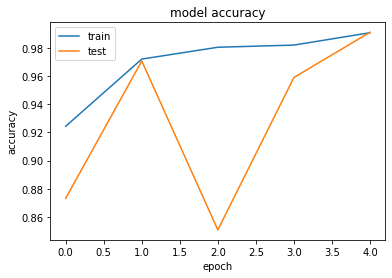

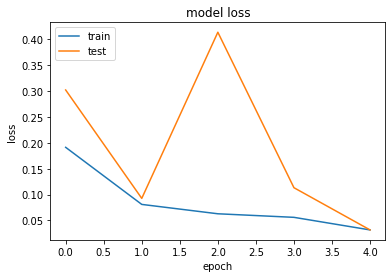

---------------------------
Distance Matrix
0 tahfut
95/95 [==============================] - 3s 30ms/step
1 mishkat-al-anwar
23/23 [==============================] - 1s 30ms/step
2 al-iqtisad fi al-_itiqad 
8/8 [==============================] - 0s 30ms/step
3 Kitab Iljam Al- Awamm an Ilm Al-Kalam
26/26 [==============================] - 1s 30ms/step
4 Kimiya-yi Saādat
27/27 [==============================] - 1s 30ms/step
5 Faysal at-Tafriqa Bayna al-Islam wa al-Zandaqa
6/6 [==============================] - 0s 30ms/step
6 Fada’ih al-Batiniyya 
5/5 [==============================] - 0s 30ms/step
7 Al-Mankhul min Taliqat al-Usul
3/3 [==============================] - 0s 31ms/step
8 Al Mustasfa min ilm al-Usul
28/28 [==============================] - 1s 31ms/step
9 Ahliyi al-Madnun bihi ala ghayri
6/6 [==============================] - 0s 30ms/step
Finish Distance Matrix
---------------------------
---------------------------
Start presentation

+++++++++++++++++++++++++++++
DWT 

tahf

history['accuracy'] =  0.986956775188446
history['val_accuracy'] =  0.9827387928962708
Finish RCNNA
---------------------------


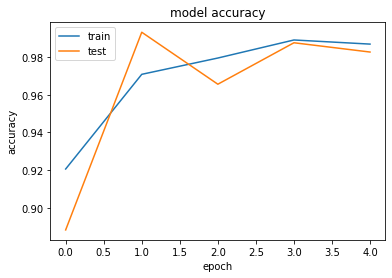

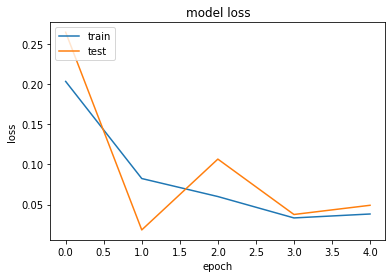

---------------------------
Distance Matrix
0 tahfut
95/95 [==============================] - 3s 30ms/step
1 mishkat-al-anwar
23/23 [==============================] - 1s 30ms/step
2 al-iqtisad fi al-_itiqad 
8/8 [==============================] - 0s 30ms/step
3 Kitab Iljam Al- Awamm an Ilm Al-Kalam
26/26 [==============================] - 1s 31ms/step
4 Kimiya-yi Saādat
27/27 [==============================] - 1s 30ms/step
5 Faysal at-Tafriqa Bayna al-Islam wa al-Zandaqa
6/6 [==============================] - 0s 30ms/step
6 Fada’ih al-Batiniyya 
5/5 [==============================] - 0s 29ms/step
7 Al-Mankhul min Taliqat al-Usul
3/3 [==============================] - 0s 30ms/step
8 Al Mustasfa min ilm al-Usul
28/28 [==============================] - 1s 31ms/step
9 Ahliyi al-Madnun bihi ala ghayri
6/6 [==============================] - 0s 31ms/step
Finish Distance Matrix
---------------------------
---------------------------
Start presentation

+++++++++++++++++++++++++++++
DWT 

tahf

history['accuracy'] =  0.9883268475532532
history['val_accuracy'] =  0.9929311275482178
Finish RCNNA
---------------------------


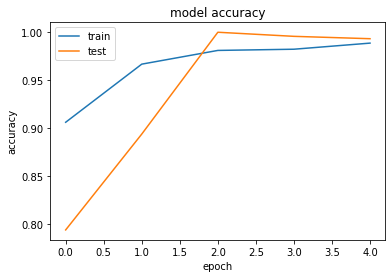

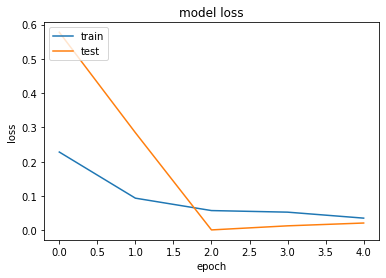

---------------------------
Distance Matrix
0 tahfut
95/95 [==============================] - 3s 30ms/step
1 mishkat-al-anwar
23/23 [==============================] - 1s 30ms/step
2 al-iqtisad fi al-_itiqad 
8/8 [==============================] - 0s 30ms/step
3 Kitab Iljam Al- Awamm an Ilm Al-Kalam
26/26 [==============================] - 1s 30ms/step
4 Kimiya-yi Saādat
27/27 [==============================] - 1s 30ms/step
5 Faysal at-Tafriqa Bayna al-Islam wa al-Zandaqa
6/6 [==============================] - 0s 30ms/step
6 Fada’ih al-Batiniyya 
5/5 [==============================] - 0s 30ms/step
7 Al-Mankhul min Taliqat al-Usul
3/3 [==============================] - 0s 29ms/step
8 Al Mustasfa min ilm al-Usul
28/28 [==============================] - 1s 31ms/step
9 Ahliyi al-Madnun bihi ala ghayri
6/6 [==============================] - 0s 31ms/step
Finish Distance Matrix
---------------------------
---------------------------
Start presentation

+++++++++++++++++++++++++++++
DWT 

tahf

history['accuracy'] =  0.6666849255561829
history['val_accuracy'] =  0.0
Finish RCNNA
---------------------------


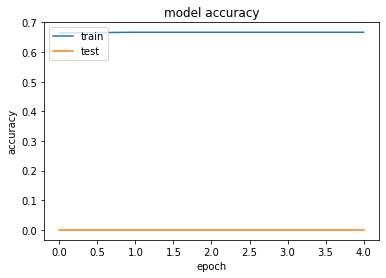

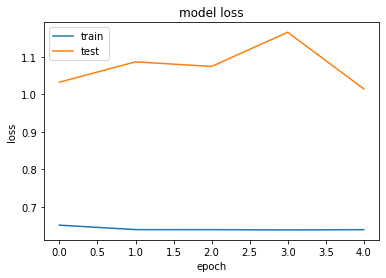

---------------------------
Distance Matrix
0 tahfut
95/95 [==============================] - 3s 30ms/step
1 mishkat-al-anwar
23/23 [==============================] - 1s 29ms/step
2 al-iqtisad fi al-_itiqad 
8/8 [==============================] - 0s 30ms/step
3 Kitab Iljam Al- Awamm an Ilm Al-Kalam
26/26 [==============================] - 1s 29ms/step
4 Kimiya-yi Saādat
27/27 [==============================] - 1s 30ms/step
5 Faysal at-Tafriqa Bayna al-Islam wa al-Zandaqa
6/6 [==============================] - 0s 29ms/step
6 Fada’ih al-Batiniyya 
5/5 [==============================] - 0s 30ms/step
7 Al-Mankhul min Taliqat al-Usul
3/3 [==============================] - 0s 30ms/step
8 Al Mustasfa min ilm al-Usul
28/28 [==============================] - 1s 30ms/step
9 Ahliyi al-Madnun bihi ala ghayri
6/6 [==============================] - 0s 30ms/step
Finish Distance Matrix
---------------------------
---------------------------
Start presentation

+++++++++++++++++++++++++++++
DWT 

tahf

history['accuracy'] =  0.9747355580329895
history['val_accuracy'] =  0.9722176790237427
Finish RCNNA
---------------------------


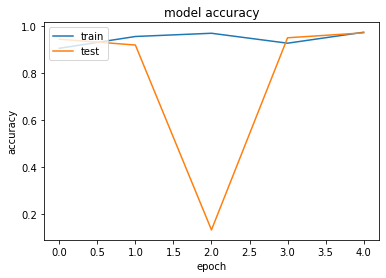

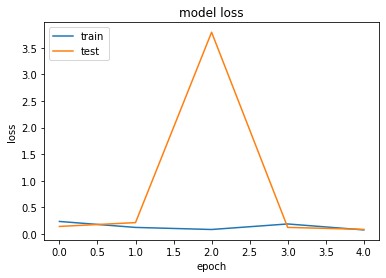

---------------------------
Distance Matrix
0 tahfut
95/95 [==============================] - 3s 30ms/step
1 mishkat-al-anwar
23/23 [==============================] - 1s 30ms/step
2 al-iqtisad fi al-_itiqad 
8/8 [==============================] - 0s 30ms/step
3 Kitab Iljam Al- Awamm an Ilm Al-Kalam
26/26 [==============================] - 1s 30ms/step
4 Kimiya-yi Saādat
27/27 [==============================] - 1s 29ms/step
5 Faysal at-Tafriqa Bayna al-Islam wa al-Zandaqa
6/6 [==============================] - 0s 29ms/step
6 Fada’ih al-Batiniyya 
5/5 [==============================] - 0s 29ms/step
7 Al-Mankhul min Taliqat al-Usul
3/3 [==============================] - 0s 29ms/step
8 Al Mustasfa min ilm al-Usul
28/28 [==============================] - 1s 30ms/step
9 Ahliyi al-Madnun bihi ala ghayri
6/6 [==============================] - 0s 34ms/step
Finish Distance Matrix
---------------------------
---------------------------
Start presentation

+++++++++++++++++++++++++++++
DWT 

tahf

history['accuracy'] =  0.9883268475532532
history['val_accuracy'] =  0.9789577722549438
Finish RCNNA
---------------------------


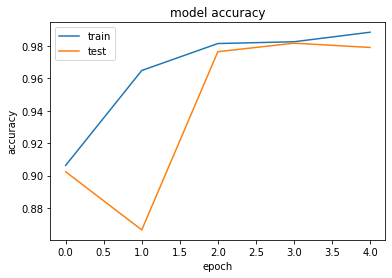

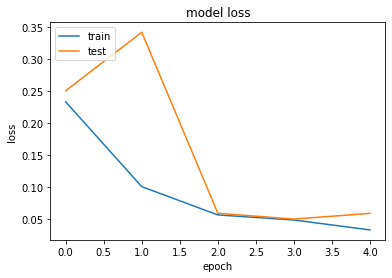

---------------------------
Distance Matrix
0 tahfut
95/95 [==============================] - 3s 30ms/step
1 mishkat-al-anwar
23/23 [==============================] - 1s 30ms/step
2 al-iqtisad fi al-_itiqad 
8/8 [==============================] - 0s 30ms/step
3 Kitab Iljam Al- Awamm an Ilm Al-Kalam
26/26 [==============================] - 1s 30ms/step
4 Kimiya-yi Saādat
27/27 [==============================] - 1s 29ms/step
5 Faysal at-Tafriqa Bayna al-Islam wa al-Zandaqa
6/6 [==============================] - 0s 29ms/step
6 Fada’ih al-Batiniyya 
5/5 [==============================] - 0s 29ms/step
7 Al-Mankhul min Taliqat al-Usul
3/3 [==============================] - 0s 29ms/step
8 Al Mustasfa min ilm al-Usul
28/28 [==============================] - 1s 29ms/step
9 Ahliyi al-Madnun bihi ala ghayri
6/6 [==============================] - 0s 33ms/step
Finish Distance Matrix
---------------------------
---------------------------
Start presentation

+++++++++++++++++++++++++++++
DWT 

tahf

history['accuracy'] =  0.6666849255561829
history['val_accuracy'] =  0.0
Finish RCNNA
---------------------------


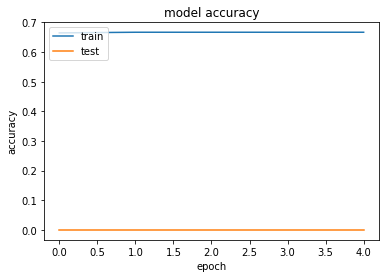

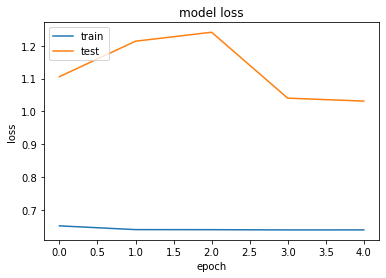

---------------------------
Distance Matrix
0 tahfut
95/95 [==============================] - 3s 29ms/step
1 mishkat-al-anwar
23/23 [==============================] - 1s 30ms/step
2 al-iqtisad fi al-_itiqad 
8/8 [==============================] - 0s 30ms/step
3 Kitab Iljam Al- Awamm an Ilm Al-Kalam
26/26 [==============================] - 1s 29ms/step
4 Kimiya-yi Saādat
27/27 [==============================] - 1s 30ms/step
5 Faysal at-Tafriqa Bayna al-Islam wa al-Zandaqa
6/6 [==============================] - 0s 29ms/step
6 Fada’ih al-Batiniyya 
5/5 [==============================] - 0s 30ms/step
7 Al-Mankhul min Taliqat al-Usul
3/3 [==============================] - 0s 30ms/step
8 Al Mustasfa min ilm al-Usul
28/28 [==============================] - 1s 30ms/step
9 Ahliyi al-Madnun bihi ala ghayri
6/6 [==============================] - 0s 35ms/step
Finish Distance Matrix
---------------------------
---------------------------
Start presentation

+++++++++++++++++++++++++++++
DWT 

Kimi

history['accuracy'] =  0.9785169959068298
history['val_accuracy'] =  0.9819168448448181
Finish RCNNA
---------------------------


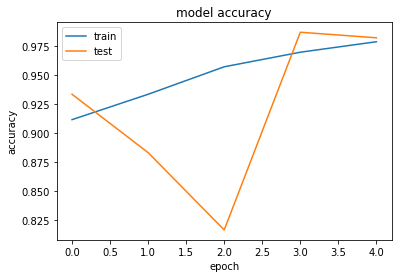

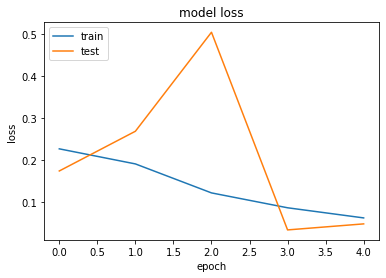

---------------------------
Distance Matrix
0 tahfut
95/95 [==============================] - 3s 29ms/step
1 mishkat-al-anwar
23/23 [==============================] - 1s 30ms/step
2 al-iqtisad fi al-_itiqad 
8/8 [==============================] - 0s 30ms/step
3 Kitab Iljam Al- Awamm an Ilm Al-Kalam
26/26 [==============================] - 1s 29ms/step
4 Kimiya-yi Saādat
27/27 [==============================] - 1s 31ms/step
5 Faysal at-Tafriqa Bayna al-Islam wa al-Zandaqa
6/6 [==============================] - 0s 30ms/step
6 Fada’ih al-Batiniyya 
5/5 [==============================] - 0s 31ms/step
7 Al-Mankhul min Taliqat al-Usul
3/3 [==============================] - 0s 29ms/step
8 Al Mustasfa min ilm al-Usul
28/28 [==============================] - 1s 31ms/step
9 Ahliyi al-Madnun bihi ala ghayri
6/6 [==============================] - 0s 31ms/step
Finish Distance Matrix
---------------------------
---------------------------
Start presentation

+++++++++++++++++++++++++++++
DWT 

tahf

In [ ]:
#@title Run Main
if __name__ == "__main__":
    main()